## (1.)  **Business Understanding**

###                       MOVIE BUSINESS ANALYSIS

In recent years, major companies have expanded into original video content, and our company is eager to follow suit by launching a new movie studio. However, with limited experience in the film industry, strategic guidance is essential.

To support this initiative, We have been tasked with conducting exploratory data analysis (EDA) on a variety of movie industry datasets. The goal is to uncover trends and insights into what types of films perform best at the box office. This analysis will inform key decisions about what genres, budgets, and release strategies our new studio should prioritize to maximize success and profitability.


## (2.)  **Data Understanding**

#### 2.0 Data Overview
To perform a comprehensive analysis of the movie industry the data was assemble from the below list of datasets each offering unique and valuable insights:
* IMD Data Base
* Box Office
* Rotten Tomatoes
* The Movie
* The Numbers

The Data contains various information about the film industry which include but not limited to genres,production companies, budgets, revenues,profitability, ratings ,language and popularity scores.

##  2.1  Import the Library


In [87]:
# import necessary library 
# This script is designed to extract data from a zip file containing a SQlite database,
# and the load the data into a pandas DataFrame.
import zipfile
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##  2.2  Import the Data

In [88]:
# Define the path to the zip file
data_path1 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\rt.movie_info.tsv.gz"
data_path2 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\rt.reviews.tsv.gz"
data_path3 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\tmdb.movies.csv.gz"
data_path4 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\tn.movie_budgets.csv.gz"
data_path5 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\bom.movie_gross.csv.gz"
# Read the data from the gzipped TSV file into a pandas DataFrame 
df_movie_info = pd.read_csv(data_path1, sep='\t', compression='gzip', encoding='ISO-8859-1')
df_reviews = pd.read_csv(data_path2, sep='\t', compression='gzip', encoding='ISO-8859-1')
df_tmdb_movies = pd.read_csv(data_path4, compression='gzip', encoding='ISO-8859-1')
df_movie_budgets = pd.read_csv(data_path3, compression='gzip', encoding='ISO-8859-1')
df_bom_movie_gross = pd.read_csv(data_path5, compression='gzip', encoding='ISO-8859-1')


## 3. Exploratory Data Analysis*

# 3.1 Explore the data
* in exploratory data analysis we are going to view all the data,check for missing values, and later clean all the dataset

In [89]:
# Display the first few rows of each DataFrame
print("Movie Info")
display(df_movie_info.shape)

print("Reviews")
display(df_reviews.shape)

print("TMDB Movies")
display(df_tmdb_movies.shape)

print("Movie Budgets")
display(df_movie_budgets.shape)

print("BOM Gross")
display(df_bom_movie_gross.shape)

Movie Info


(1560, 12)

Reviews


(54432, 8)

TMDB Movies


(5782, 6)

Movie Budgets


(26517, 10)

BOM Gross


(3387, 5)

In [90]:
# Display the first few rows of each DataFrame
print("Movie Info")
display(df_movie_info.head())

print("Reviews")
display(df_reviews.head())

print("TMDB Movies")
display(df_tmdb_movies.head())

print("Movie Budgets")
display(df_movie_budgets.head())

print("BOM Gross")
display(df_bom_movie_gross.head())



Movie Info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


TMDB Movies


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Movie Budgets


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


BOM Gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [91]:
# Display the summary statistics of each DataFrame
print("Movie Info Summary")
display(df_movie_info.describe(include='all'))

print("\nReviews Summary")
display(df_reviews.describe(include='all'))

print("\nTMDB Movies Summary")
display(df_tmdb_movies.describe(include='all'))

print("\nMovie Budgets Summary")
display(df_movie_budgets.describe(include='all'))

print("\nBOM Gross Summary")
display(df_bom_movie_gross.describe(include='all'))


Movie Info Summary


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560.000000,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,NaN,1497,6,299,1125,1069,1025,717,1,336,142,200
top,NaN,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"600,000",90 minutes,Universal Pictures
freq,NaN,2,521,151,10,4,8,11,340,2,72,35
mean,1007.303846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,579.164527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,504.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1007.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1503.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Reviews Summary


,id,review,rating,fresh,critic,top_critic,publisher,date
count,54432.000000,48869,40915,54432,51710,54432.000000,54123,54432
unique,NaN,48682,186,2,3496,NaN,1281,5963
top,NaN,Parental Content Review,3/5,fresh,Emanuel Levy,NaN,eFilmCritic.com,"January 1, 2000"
freq,NaN,24,4327,33035,595,NaN,673,4303
mean,1045.706882,NaN,NaN,NaN,NaN,0.240594,NaN,NaN
std,586.657046,NaN,NaN,NaN,NaN,0.427448,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,542.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1083.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1541.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN



TMDB Movies Summary


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5782,5782,5782,5782
unique,NaN,2418,5698,509,5164,5356
top,NaN,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,NaN,24,3,231,548,367
mean,50.372363,NaN,NaN,NaN,NaN,NaN
std,28.821076,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN,NaN,NaN
75%,75.000000,NaN,NaN,NaN,NaN,NaN



Movie Budgets Summary


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,26517.00000,26517,26517.000000,26517,26517,26517.000000,26517,26517,26517.000000,26517.000000
unique,NaN,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,NaN,[99],NaN,en,Eden,NaN,2010-01-01,Eden,NaN,NaN
freq,NaN,3700,NaN,23291,7,NaN,269,7,NaN,NaN
mean,13258.00000,NaN,295050.153260,NaN,NaN,3.130912,NaN,NaN,5.991281,194.224837
std,7654.94288,NaN,153661.615648,NaN,NaN,4.355229,NaN,NaN,1.852946,960.961095
min,0.00000,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,6629.00000,NaN,157851.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,2.000000
50%,13258.00000,NaN,309581.000000,NaN,NaN,1.374000,NaN,NaN,6.000000,5.000000
75%,19887.00000,NaN,419542.000000,NaN,NaN,3.694000,NaN,NaN,7.000000,28.000000



BOM Gross Summary


,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [92]:
# Display the information about each DataFrame
# This includes the number of entries, column names, data types, and memory usage,
# which is useful for understanding the structure of the data 
print("Movie Info DataFrame Info")
df_movie_info.info()
print("\n---------------------------\n")

print("Reviews DataFrame Info")
df_reviews.info()
print("\n---------------------------\n")

print("TMDB Movies DataFrame Info")
df_tmdb_movies.info()
print("\n---------------------------\n")

print("Budgets DataFrame Info")
df_movie_budgets.info()
print("\n---------------------------\n")

print("BOM Gross DataFrame Info")
df_bom_movie_gross.info()
print("\n---------------------------\n")



Movie Info DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB

---------------------------

Reviews DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------

In [93]:
# Check column names in each DataFrame

print("Columns in Movie Info:")
print(df_movie_info.columns.tolist(), "\n")

print("Columns in Reviews:")
print(df_reviews.columns.tolist(), "\n")

print("Columns in TMDB Movies:")
print(df_tmdb_movies.columns.tolist(), "\n")

print("Columns in Movie Budgets:")
print(df_movie_budgets.columns.tolist(), "\n")

print("Columns in BOM Gross:")
print(df_bom_movie_gross.columns.tolist(), "\n")


Columns in Movie Info:
['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'] 

Columns in Reviews:
['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date'] 

Columns in TMDB Movies:
['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'] 

Columns in Movie Budgets:
['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count'] 

Columns in BOM Gross:
['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'] 



In [94]:
# Function to calculate and display missing values in each DataFrame
# This function creates a table showing the count and percentage of missing values for each column in the DataFrame.
def missing_values_table(df, df_name):
    total_missing = df.isnull().sum()
    percent_missing = (total_missing / len(df)) * 100
    missing_table = (
        pd.concat([total_missing, percent_missing], axis=1)
          .rename(columns={0: 'Missing Values', 1: '% of Total Values'})
          .sort_values(by='Missing Values', ascending=False)
    )
    print(f"\nMissing Values in {df_name} (Count and Percentage):")
    display(missing_table)
    print("\n" + "-"*50 + "\n")

# Display missing values for each DataFrame
missing_values_table(df_movie_info, "Movie Info")
missing_values_table(df_reviews, "Reviews")
missing_values_table(df_tmdb_movies, "TMDB Movies")
missing_values_table(df_movie_budgets, "Movie Budgets")
missing_values_table(df_bom_movie_gross, "BOM Gross")



Missing Values in Movie Info (Count and Percentage):


,Missing Values,% of Total Values
currency,1220,78.205128
box_office,1220,78.205128
studio,1066,68.333333
writer,449,28.782051
theater_date,359,23.012821
dvd_date,359,23.012821
director,199,12.756410
synopsis,62,3.974359
runtime,30,1.923077
genre,8,0.512821



--------------------------------------------------


Missing Values in Reviews (Count and Percentage):


,Missing Values,% of Total Values
rating,13517,24.832819
review,5563,10.220091
critic,2722,5.000735
publisher,309,0.567681
id,0,0.000000
fresh,0,0.000000
top_critic,0,0.000000
date,0,0.000000



--------------------------------------------------


Missing Values in TMDB Movies (Count and Percentage):


,Missing Values,% of Total Values
id,0,0.0
release_date,0,0.0
movie,0,0.0
production_budget,0,0.0
domestic_gross,0,0.0
worldwide_gross,0,0.0



--------------------------------------------------


Missing Values in Movie Budgets (Count and Percentage):


,Missing Values,% of Total Values
Unnamed: 0,0,0.0
genre_ids,0,0.0
id,0,0.0
original_language,0,0.0
original_title,0,0.0
popularity,0,0.0
release_date,0,0.0
title,0,0.0
vote_average,0,0.0
vote_count,0,0.0



--------------------------------------------------


Missing Values in BOM Gross (Count and Percentage):


,Missing Values,% of Total Values
foreign_gross,1350,39.858282
domestic_gross,28,0.826690
studio,5,0.147623
title,0,0.000000
year,0,0.000000



--------------------------------------------------



## 3.2 **Data Preperation**
 
 ### Missing Values Handling in `df_movie_info`

1. **Drop columns with very high missingness (>60%)**:  
   Columns like `currency`, `box_office`, and `studio` have over 60% missing values, making them unreliable. Therefore, they were dropped.

2. **Fill categorical missing values with 'Unknown'**:  
   For `writer` and `director`, missing entries are replaced with the string `'Unknown'` to retain these columns without losing data.

3. **Convert date columns and fill missing with a placeholder date**:  
   `theater_date` and `dvd_date` are converted to datetime objects. Missing dates are filled with a placeholder (`1900-01-01`) to indicate missingness while keeping the data type consistent.

4. **Fill synopsis missing values with a default message**:  
   Missing `synopsis` values are replaced with `'No synopsis available'`.

5. **Fill numerical missing values with central tendency**:  
   `runtime` missing values are filled with the median runtime to avoid bias from outliers.

6. **Fill low missingness categorical variables with mode**:  
   For `genre` and `rating`, missing values are filled with the most frequent category (mode), which is a common imputation technique for categorical data.



 

In [95]:
# Drop columns if they exist, ignoring missing columns
df_movie_info = df_movie_info.drop(columns=['currency', 'box_office', 'studio'], errors='ignore')

# Fill missing categorical values with 'Unknown'
df_movie_info['writer'] = df_movie_info['writer'].fillna('Unknown')
df_movie_info['director'] = df_movie_info['director'].fillna('Unknown')

# Convert dates with specified format if known, else fallback
df_movie_info['theater_date'] = pd.to_datetime(df_movie_info['theater_date'], format='%Y-%m-%d', errors='coerce')
df_movie_info['dvd_date'] = pd.to_datetime(df_movie_info['dvd_date'], format='%Y-%m-%d', errors='coerce')

df_movie_info['theater_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
df_movie_info['dvd_date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)

# Fill synopsis missing with default string
df_movie_info['synopsis'] = df_movie_info['synopsis'].fillna('No synopsis available')

# Convert 'runtime' to numeric, coercing errors to NaN
df_movie_info['runtime'] = pd.to_numeric(df_movie_info['runtime'], errors='coerce')

# Drop rows with missing 'runtime'
df_movie_info = df_movie_info.dropna(subset=['runtime'])



In [96]:
# Convert 'date' column to datetime (handle errors gracefully)
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Convert 'fresh' column to categorical type
df_reviews['fresh'] = df_reviews['fresh'].astype('category')

# Convert 'top_critic' column to boolean (0/1 to True/False)
df_reviews['top_critic'] = df_reviews['top_critic'].astype(bool)

# Fill missing values in text and categorical columns
df_reviews['review'] = df_reviews['review'].fillna('No review provided')
df_reviews['rating'] = df_reviews['rating'].fillna('No rating')
df_reviews['critic'] = df_reviews['critic'].fillna('Unknown critic')
df_reviews['publisher'] = df_reviews['publisher'].fillna('Unknown publisher')


## 3.2.1 Data Cleaning: `foreign_gross` Column

This section focuses on cleaning and preparing the `foreign_gross` column for analysis. The steps taken are outlined below:

### 1. Remove Special Characters
We remove special characters like dollar signs (`$`) and commas (`,`) from the `foreign_gross` column using a regular expression. These characters can interfere with numeric conversion.

```python
df_bom_movie_gross['foreign_gross'] = df_bom_movie_gross['foreign_gross'].replace(r'[\$,]', '', regex=True)


In [97]:
# 1. Clean 'foreign_gross' column: remove $, commas, convert to numeric
df_bom_movie_gross['foreign_gross'] = df_bom_movie_gross['foreign_gross'].replace(r'[\$,]', '', regex=True)
df_bom_movie_gross['foreign_gross'] = pd.to_numeric(df_bom_movie_gross['foreign_gross'], errors='coerce')

# fill missing values in 'foreign_gross' with the median
# This ensures that the median value is used to fill in any gaps in the data.
median_fg = df_bom_movie_gross['foreign_gross'].median()
df_bom_movie_gross['foreign_gross'] = df_bom_movie_gross['foreign_gross'].fillna(median_fg)

# 2. Drop rows with missing key financial data
df_bom_movie_gross_clean = df_bom_movie_gross.dropna(subset=['domestic_gross', 'foreign_gross'])



In [98]:
# List of all DataFrames
dataframes = {
    "Movie Info": df_movie_info,
    "Reviews": df_reviews,
    "TMDB Movies": df_tmdb_movies,
    "Movie Budgets": df_movie_budgets,
    "BOM Gross": df_bom_movie_gross
}

for name, df in dataframes.items():
    print(f"\n--- 🔍 Checking {name} ---")

    # 1. Missing values
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    print("Missing Values:")
    print(pd.DataFrame({'Count': missing, '% of Total': missing_percent.round(2)}))

    # 2. Data types
    print("\nData Types:")
    print(df.dtypes)

    # 3. Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate Rows: {duplicates}")

    # 4. Basic structure
    print(f"\nShape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")



--- 🔍 Checking Movie Info ---
Missing Values:
              Count  % of Total
id                0         NaN
synopsis          0         NaN
rating            0         NaN
genre             0         NaN
director          0         NaN
writer            0         NaN
theater_date      0         NaN
dvd_date          0         NaN
runtime           0         NaN

Data Types:
id                       int64
synopsis                object
rating                  object
genre                   object
director                object
writer                  object
theater_date    datetime64[ns]
dvd_date        datetime64[ns]
runtime                float64
dtype: object

Duplicate Rows: 0

Shape: (0, 9)
Columns: ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'runtime']

--- 🔍 Checking Reviews ---
Missing Values:
            Count  % of Total
id              0         0.0
review          0         0.0
rating          0         0.0
fresh           0    

In [99]:
# Data type conversion and cleaning
# Movie Info
df_movie_info['rating'] = pd.to_numeric(df_movie_info['rating'], errors='coerce')  # convert rating to float if numeric

# Reviews
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')  # convert rating to float if numeric
df_reviews['fresh'] = df_reviews['fresh'].astype('category')
df_reviews['top_critic'] = df_reviews['top_critic'].astype('bool')
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# TMDB Movies
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies['release_date'], errors='coerce')
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    df_tmdb_movies[col] = pd.to_numeric(df_tmdb_movies[col].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Movie Budgets
df_movie_budgets['release_date'] = pd.to_datetime(df_movie_budgets['release_date'], errors='coerce')

# BOM Gross
# Already mostly numeric, just ensure no object sneaked in 
df_bom_movie_gross['domestic_gross'] = pd.to_numeric(df_bom_movie_gross['domestic_gross'], errors='coerce')
df_bom_movie_gross['foreign_gross'] = pd.to_numeric(df_bom_movie_gross['foreign_gross'], errors='coerce')

# Display the data types of each DataFrame
print(df_movie_info.dtypes)
print(df_reviews.dtypes)
print(df_tmdb_movies.dtypes)
print(df_movie_budgets.dtypes)
print(df_bom_movie_gross.dtypes)



id                       int64
synopsis                object
rating                   int64
genre                   object
director                object
writer                  object
theater_date    datetime64[ns]
dvd_date        datetime64[ns]
runtime                float64
dtype: object
id                     int64
review                object
rating               float64
fresh               category
critic                object
top_critic              bool
publisher             object
date          datetime64[ns]
dtype: object
id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object
Unnamed: 0                    int64
genre_ids                    object
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date   

In [100]:
# Convert object columns to string type for consistency
# This function iterates through all object columns in the DataFrame and converts them to strings
def convert_object_to_string(df):
    obj_cols = df.select_dtypes(include=['object']).columns
    for col in obj_cols:
        df[col] = df[col].astype('string')
    return df

# Convert object columns to string type for all DataFrames 
df_movie_info = convert_object_to_string(df_movie_info)
df_reviews = convert_object_to_string(df_reviews)
df_tmdb_movies = convert_object_to_string(df_tmdb_movies)
df_movie_budgets = convert_object_to_string(df_movie_budgets)
df_bom_movie_gross = convert_object_to_string(df_bom_movie_gross)

# Display the data types of each DataFrame after conversion 
print(df_movie_info.dtypes)
print(df_reviews.dtypes)
print(df_tmdb_movies.dtypes)
print(df_movie_budgets.dtypes)
print(df_bom_movie_gross.dtypes)


id                       int64
synopsis        string[python]
rating                   int64
genre           string[python]
director        string[python]
writer          string[python]
theater_date    datetime64[ns]
dvd_date        datetime64[ns]
runtime                float64
dtype: object
id                     int64
review        string[python]
rating               float64
fresh               category
critic        string[python]
top_critic              bool
publisher     string[python]
date          datetime64[ns]
dtype: object
id                            int64
release_date         datetime64[ns]
movie                string[python]
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object
Unnamed: 0                    int64
genre_ids            string[python]
id                            int64
original_language    string[python]
original_title       string[python]
popularity                  float64
release_date   

### 3.3 Merging Multiple Movie Datasets

This cell performs the following steps to prepare a unified movie dataset:

1. **Load Data**  
   Reads five compressed datasets using `pandas`:
   - `rt.movie_info.tsv.gz`: Rotten Tomatoes movie metadata
   - `rt.reviews.tsv.gz`: Rotten Tomatoes user and critic reviews
   - `tmdb.movies.csv.gz`: Metadata from The Movie Database (TMDB)
   - `tn.movie_budgets.csv.gz`: Budget data from The Numbers
   - `bom.movie_gross.csv.gz`: Gross earnings data from Box Office Mojo

2. **Merge Steps**  
   The datasets are merged step-by-step to enrich the data:
   - Merge **movie info** with **TMDB movies** on `id`
   - Merge the result with **reviews** on `id`
   - Merge with **box office gross** on `title`
   - Merge with **movie budgets** on `id` if available; otherwise, use `title`

3. **Save Merged Dataset**  
   The final merged DataFrame is saved to `merged_movies_data.csv` for future analysis.

This process integrates various sources to create a comprehensive dataset for movie data analysis.


In [101]:
# Define the paths to the datasets
# These paths should point to the gzipped CSV files containing the movie data.
data_path1 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\rt.movie_info.tsv.gz"
data_path2 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\rt.reviews.tsv.gz"
data_path3 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\tmdb.movies.csv.gz"
data_path4 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\tn.movie_budgets.csv.gz"
data_path5 = r"C:\Users\Admin\OneDrive\Documents\Milan projects\Group3-End-of-Phase2-Project\Group3-End-of-Phase2-Project\zippedData\bom.movie_gross.csv.gz"

# Read the datasets into pandas DataFrames
df_movie_info = pd.read_csv(data_path1, sep='\t', compression='gzip', encoding='ISO-8859-1')
df_reviews = pd.read_csv(data_path2, sep='\t', compression='gzip', encoding='ISO-8859-1')
df_tmdb_movies = pd.read_csv(data_path3, compression='gzip', encoding='ISO-8859-1')       # Correct: data_path3 is tmdb.movies
df_movie_budgets = pd.read_csv(data_path4, compression='gzip', encoding='ISO-8859-1')     # Correct: data_path4 is tn.movie_budgets
df_bom_movie_gross = pd.read_csv(data_path5, compression='gzip', encoding='ISO-8859-1')

# Merge the datasets step by step
# Step 1: Merge movie info with TMDB movies on 'id'
merged_df = pd.merge(df_movie_info, df_tmdb_movies, on='id', how='left')

# Step 2: Merege with reviews on 'id'
merged_df = pd.merge(merged_df, df_reviews, on='id', how='left')

# Step 3: Merge BOM movie gross on 'title'
merged_df = pd.merge(merged_df, df_bom_movie_gross, on='title', how='left')

# Step 4: Merge movie budgets on 'id' or 'title'
# Check if 'id' exists in both DataFrames to decide on the merge key 
if 'id' in df_movie_budgets.columns and 'id' in merged_df.columns:
    merged_df = pd.merge(merged_df, df_movie_budgets, on='id', how='left')
else:
    merged_df = pd.merge(merged_df, df_movie_budgets, on='title', how='left')

# Save merged dataframe to a CSV file
merged_df.to_csv("merged_movies_data.csv", index=False, encoding='utf-8')
print("✅ Merged data saved as 'merged_movies_data.csv'")

✅ Merged data saved as 'merged_movies_data.csv'


In [102]:
df = pd.read_csv("merged_movies_data.csv")
df.head(20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20888\806389017.py:1: DtypeWarning: Columns (13,14,15,17,18,28,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_movies_data.csv")


,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,...,date,studio_y,domestic_gross_x,foreign_gross,year,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377"
2,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430"
3,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177"
4,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309"
5,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Jun 8, 2007",Ocean's Thirteen,"$85,000,000","$117,144,465","$311,744,465"
6,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Nov 26, 2003",Timeline,"$80,000,000","$19,480,739","$26,703,184"
7,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Aug 21, 2009",Inglourious Basterds,"$70,000,000","$120,774,594","$316,915,264"
8,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Nov 21, 2012",Red Dawn,"$65,000,000","$44,806,783","$48,164,150"
9,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Nov 26, 1997",Alien: Resurrection,"$60,000,000","$47,795,018","$160,700,000"


In [103]:
# Calculate missing values in the merged DataFrame
missing_count = merged_df.isnull().sum()
missing_percent = (missing_count / len(merged_df)) * 100

# Create a DataFrame to summarize missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})

# Filter out columns with no missing values and sort by percentage
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

# Display the missing values summary
print("🔍 Missing Values Summary:")
print(missing_data)




🔍 Missing Values Summary:
                   Missing Values  Percentage (%)
domestic_gross_x           237944       99.930704
foreign_gross              237944       99.930704
year                       237944       99.930704
studio_y                   237944       99.930704
vote_average               228247       95.858199
genre_ids                  228247       95.858199
vote_count                 228247       95.858199
title                      228247       95.858199
release_date_x             228247       95.858199
popularity                 228247       95.858199
original_title             228247       95.858199
original_language          228247       95.858199
Unnamed: 0                 228247       95.858199
box_office                  95643       40.167738
currency                    95643       40.167738
studio_x                    66446       27.905707
writer                      63251       26.563885
rating_y                    57890       24.312395
release_date_y          

In [104]:
# Define the columns to drop
cols_to_drop = [
    'domestic_gross_x', 'foreign_gross', 'year', 'studio_y',
    'vote_average', 'genre_ids', 'vote_count', 'title',
    'release_date_x', 'popularity', 'original_title',
    'original_language', 'Unnamed: 0', 'box_office', 'currency'
]

# Drop the columns from the DataFrame
df = df.drop(columns=cols_to_drop)

In [105]:
# 1. Handle missing values in categorical columns
# Fill missing values in categorical columns with 'unknown' or approriate defaults
df['studio_x'] = df['studio_x'].fillna('Unknown')
df['writer'] = df['writer'].fillna('Unknown')
df['rating_y'] = df['rating_y'].fillna('Unrated')
df['release_date_y'] = df['release_date_y'].fillna('Missing')
df['movie'] = df['movie'].fillna('Missing')
df['production_budget'] = df['production_budget'].fillna(0)
df['domestic_gross_y'] = df['domestic_gross_y'].fillna(0)
df['worldwide_gross'] = df['worldwide_gross'].fillna(0)

# 2. Handle missing values in numerical columns
df['runtime'] = df['runtime'].str.extract(r'(\d+)').astype(float)
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

# 3. Handle missing values in date columns
df['director'] = df['director'].fillna('Unknown')
df['review'] = df['review'].fillna('No review')
df['critic'] = df['critic'].fillna('Anonymous')
df['dvd_date'] = df['dvd_date'].fillna(method='ffill')
df['theater_date'] = df['theater_date'].fillna(method='ffill')
df['synopsis'] = df['synopsis'].fillna('No synopsis')
df['genre'] = df['genre'].fillna('Unknown')
df['rating_x'] = df['rating_x'].fillna('Unrated')
df['publisher'] = df['publisher'].fillna('Unknown')
df['top_critic'] = df['top_critic'].fillna(False)
df['date'] = df['date'].fillna(method='ffill')
df['fresh'] = df['fresh'].fillna('unknown')

# 4. Handle missing values in date columns
df['date'] = df['date'].fillna(method='ffill').fillna(method='bfill')



# Display the cleaned DataFrame
print("✅ Remaining missing values per column:")
print(df.isnull().sum())


✅ Remaining missing values per column:
id                   0
synopsis             0
rating_x             0
genre                0
director             0
writer               0
theater_date         0
dvd_date             0
runtime              0
studio_x             0
review               0
rating_y             0
fresh                0
critic               0
top_critic           0
publisher            0
date                 0
release_date_y       0
movie                0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64


In [106]:
df.head(20)

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,runtime,studio_x,...,fresh,critic,top_critic,publisher,date,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","May 29, 2009",Up,"$175,000,000","$293,004,164","$731,463,377"
2,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Mar 7, 2014",Mr. Peabody & Sherman,"$145,000,000","$111,506,430","$269,806,430"
3,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Dec 17, 2010",How Do You Know?,"$120,000,000","$30,212,620","$49,628,177"
4,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309"
5,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Jun 8, 2007",Ocean's Thirteen,"$85,000,000","$117,144,465","$311,744,465"
6,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Nov 26, 2003",Timeline,"$80,000,000","$19,480,739","$26,703,184"
7,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Aug 21, 2009",Inglourious Basterds,"$70,000,000","$120,774,594","$316,915,264"
8,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Nov 21, 2012",Red Dawn,"$65,000,000","$44,806,783","$48,164,150"
9,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104.0,Unknown,...,unknown,Anonymous,False,Unknown,"November 10, 2018","Nov 26, 1997",Alien: Resurrection,"$60,000,000","$47,795,018","$160,700,000"


In [107]:
# Check data types
print(df.dtypes)


id                     int64
synopsis              object
rating_x              object
genre                 object
director              object
writer                object
theater_date          object
dvd_date              object
runtime              float64
studio_x              object
review                object
rating_y              object
fresh                 object
critic                object
top_critic            object
publisher             object
date                  object
release_date_y        object
movie                 object
production_budget     object
domestic_gross_y      object
worldwide_gross       object
dtype: object


In [108]:
date_format = '%Y-%m-%d'

for col in ['theater_date', 'dvd_date', 'date', 'release_date_y']:
    df[col] = pd.to_datetime(df[col], format=date_format, errors='coerce')

# Convert monetary columns to numeric
money_columns = ['production_budget', 'domestic_gross_y', 'worldwide_gross']
df[money_columns] = df[money_columns].replace('[\$,]', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Ensure string columns use string dtype
string_columns = ['synopsis', 'rating_x', 'genre', 'director', 'writer', 'studio_x',
                  'review', 'rating_y', 'fresh', 'critic', 'top_critic', 'publisher', 'movie']
df[string_columns] = df[string_columns].astype('string')


In [109]:
# Check data types
print(df.dtypes)

id                            int64
synopsis             string[python]
rating_x             string[python]
genre                string[python]
director             string[python]
writer               string[python]
theater_date         datetime64[ns]
dvd_date             datetime64[ns]
runtime                     float64
studio_x             string[python]
review               string[python]
rating_y             string[python]
fresh                string[python]
critic               string[python]
top_critic           string[python]
publisher            string[python]
date                 datetime64[ns]
release_date_y       datetime64[ns]
movie                string[python]
production_budget             int64
domestic_gross_y              int64
worldwide_gross               int64
dtype: object


In [110]:
df.columns

Index(['id', 'synopsis', 'rating_x', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime', 'studio_x', 'review', 'rating_y',
       'fresh', 'critic', 'top_critic', 'publisher', 'date', 'release_date_y',
       'movie', 'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

## 4 **Visualization**

## Calculate Profit & ROI

In [111]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['ROI'] = df['profit'] / df['production_budget']


## 4.1 Explore Top Performing Genres

* Calculate average profit and ROI by genre:

In [112]:
genre_summary = df.groupby('genre').agg({
    'production_budget': 'mean',
    'worldwide_gross': 'mean',
    'profit': 'mean',
    'ROI': 'mean'
}).sort_values(by='profit', ascending=False)

print(genre_summary.head(10))


                                                    production_budget  \
genre                                                                   
Musical and Performing Arts                              3.232860e+07   
Classics|Comedy|Musical and Performing Arts              3.075748e+07   
Art House and International|Comedy|Drama|Musica...       3.250386e+07   
Action and Adventure|Drama|Science Fiction and ...       3.162753e+07   
Art House and International|Classics|Horror|Mys...       3.148119e+07   
Comedy|Kids and Family|Romance                           3.050624e+07   
Comedy|Mystery and Suspense|Science Fiction and...       2.989371e+07   
Comedy|Musical and Performing Arts                       3.123287e+07   
Comedy|Drama|Kids and Family|Romance                     3.036996e+07   
Action and Adventure|Drama|Horror|Mystery and S...       2.972835e+07   

                                                    worldwide_gross  \
genre                                               

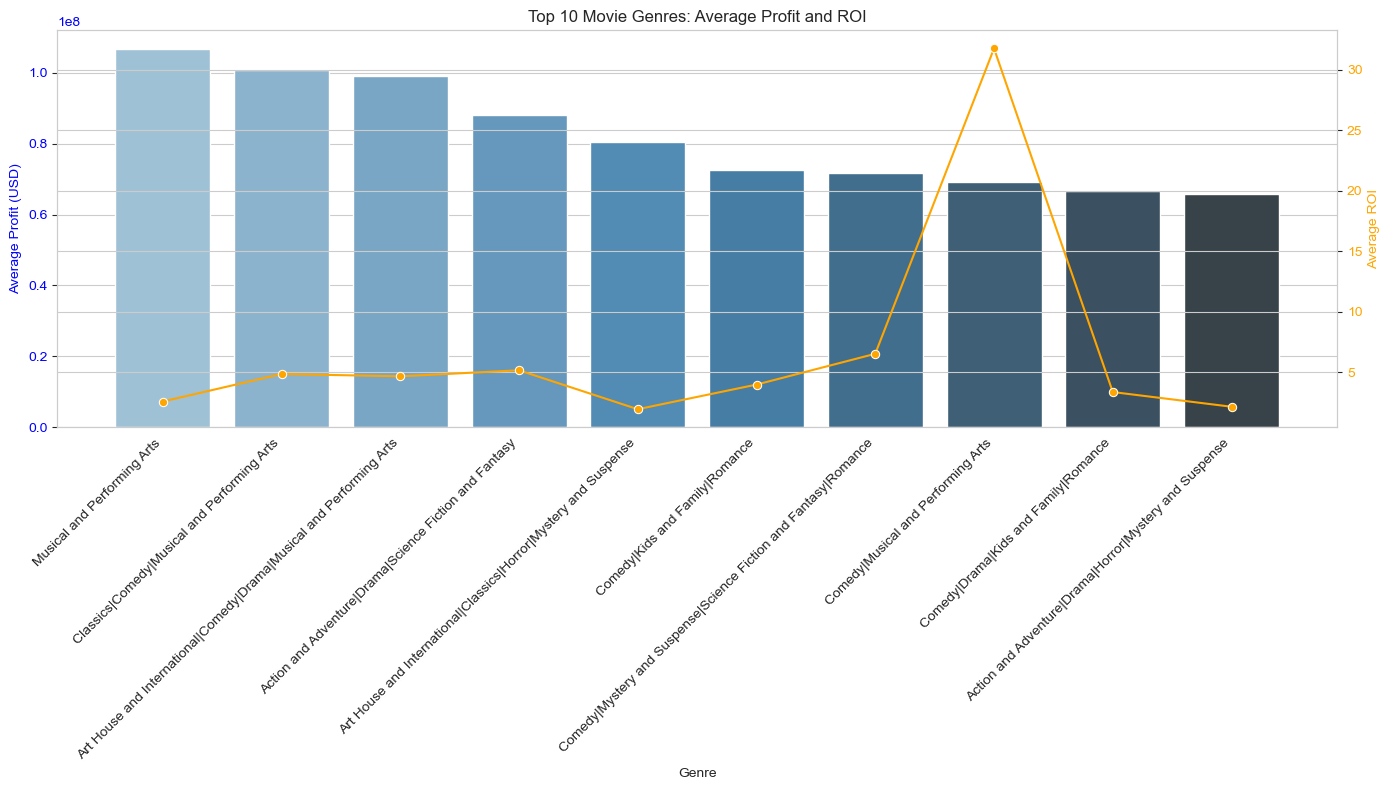

In [113]:
# genre_summary is already aggregated and sorted by profit descending
top_10 = genre_summary.head(10)

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot: average profit by genre
sns.barplot(x=top_10.index, y='profit', data=top_10, ax=ax1, palette='Blues_d')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Average Profit (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_10.index, rotation=45, ha='right')

# Second y-axis for ROI (line plot)
ax2 = ax1.twinx()
sns.lineplot(x=top_10.index, y='ROI', data=top_10, ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Average ROI', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top 10 Movie Genres: Average Profit and ROI')
plt.tight_layout()
plt.show()


## 4.2 Budget vs Profit Relationship

## Scatter Plot of Production Budget vs Profit


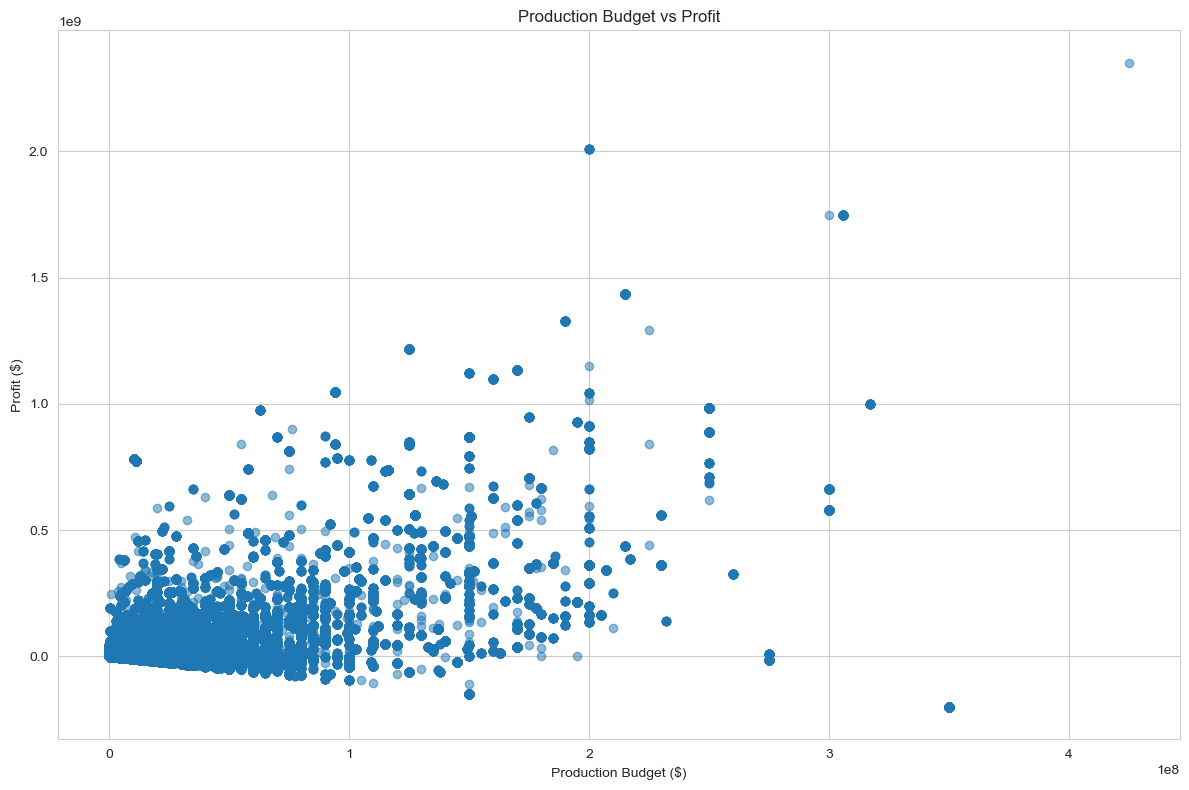

In [114]:
# Scatter plot of production budget vs profit
# This plot visualizes the relationship between production budget and profit for movies in the dataset.
plt.figure(figsize=(12, 8))  # Width=12 inches, Height=8 inches
plt.scatter(df['production_budget'], df['profit'], alpha=0.5)
plt.xlabel('Production Budget ($)')
plt.ylabel('Profit ($)')
plt.title('Production Budget vs Profit')
plt.grid(True)  # Optional: adds grid lines for better readability
plt.tight_layout()  # Optional: adjusts padding
plt.show()


### 4.3 Domestic vs Worldwide Gross by Genre

This scatter plot visualizes the relationship between **Domestic Gross** (U.S. revenue) and **Worldwide Gross** (global revenue) across different movie genres.

- **X-axis**: Represents the **Domestic Gross** of the movies (box office revenue from the U.S.).
- **Y-axis**: Represents the **Worldwide Gross** (global box office revenue including international markets).
- **Hue (Color)**: Each point is colored according to its **Genre**, allowing us to compare how different genres perform both domestically and globally.

---

### Insights from the Chart:
- **Genres above the diagonal** (where the Y-value is higher than the X-value) suggest that these genres perform better **globally** than **domestically**. For example, **Action** and **Sci-Fi** often do well worldwide.

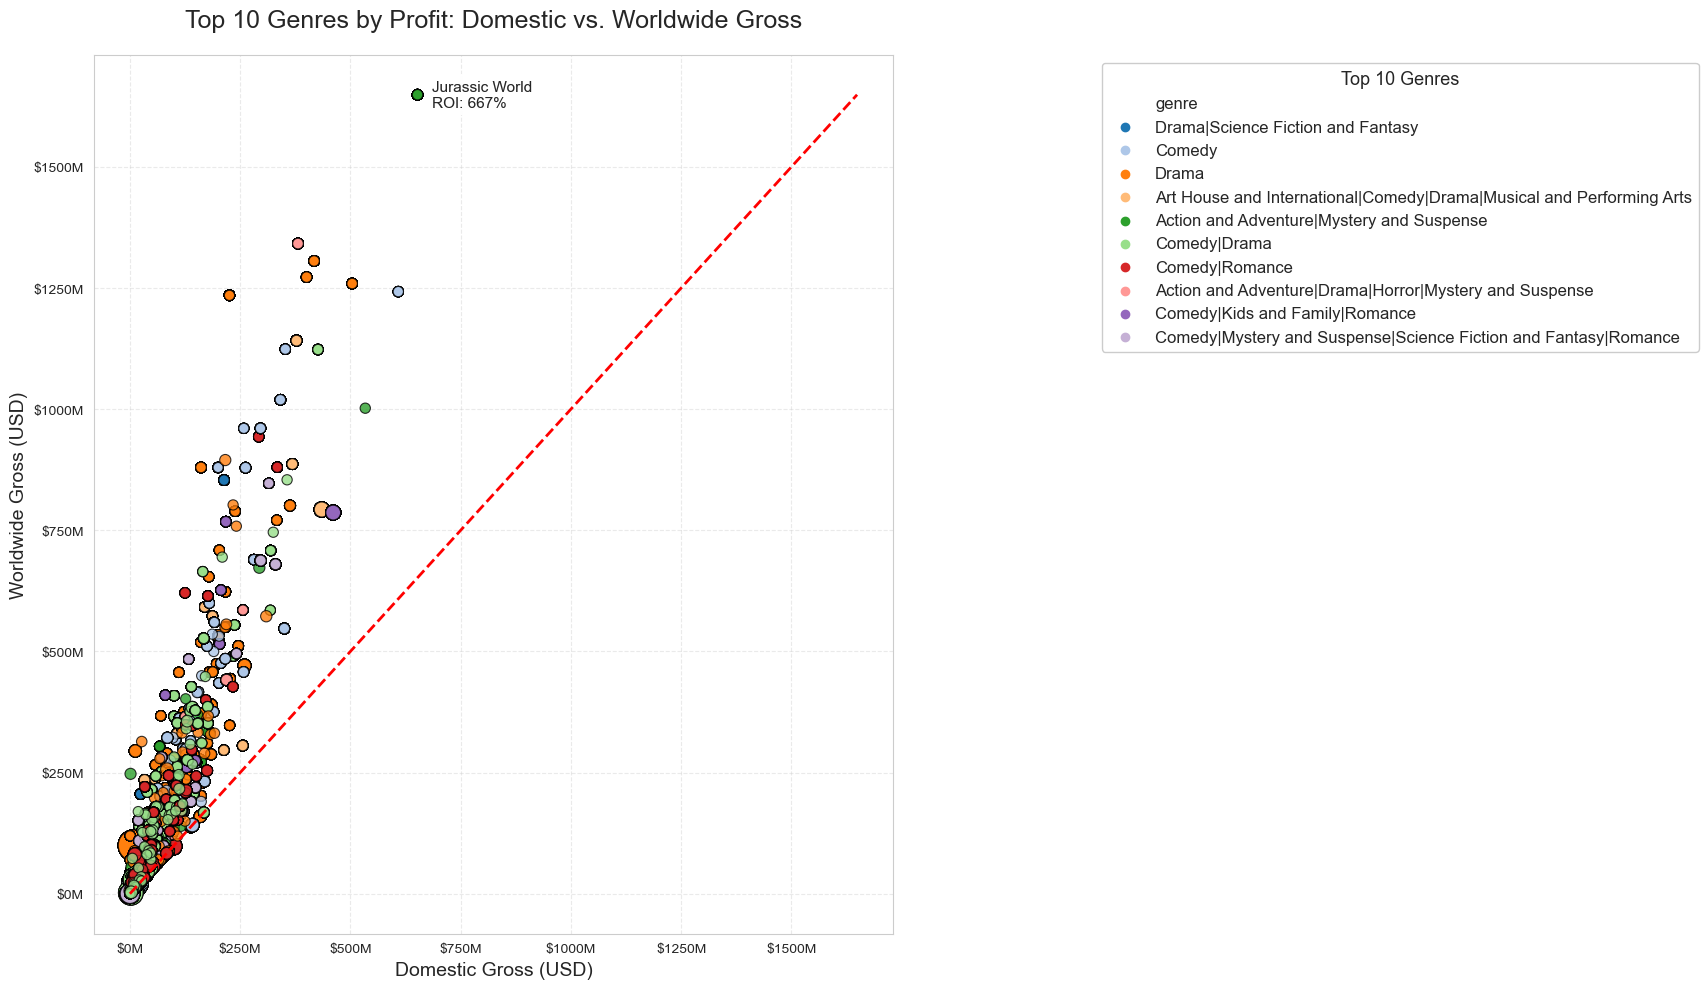

In [115]:
# --- Data Cleaning ---
def clean_currency(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace(',', ''))
    return value

# Apply cleaning
df['production_budget'] = df['production_budget'].apply(clean_currency)
df['domestic_gross_y'] = df['domestic_gross_y'].apply(clean_currency)
df['worldwide_gross'] = df['worldwide_gross'].apply(clean_currency)

# --- Financial Metrics ---
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['ROI'] = (df['profit'] / df['production_budget']) * 100

# --- Filter Valid Data ---
df = df.dropna(subset=['domestic_gross_y', 'worldwide_gross', 'genre'])
df = df[(df['domestic_gross_y'] > 0) & (df['worldwide_gross'] > 0)]

# --- Get Top 10 Genres by Profit ---
top_genres = df.groupby('genre')['profit'].sum().nlargest(10).index
df_filtered = df[df['genre'].isin(top_genres)]

# --- Visualization ---
plt.figure(figsize=(18, 10))  # Increased figure size

# Scatter plot with filtered genres
scatter = sns.scatterplot(
    data=df_filtered,
    x='domestic_gross_y',
    y='worldwide_gross',
    hue='genre',
    size='ROI',
    sizes=(50, 500),  # Increased size range
    alpha=0.8,
    palette='tab20',
    edgecolor='black',
    linewidth=0.8
)

# Diagonal reference line
max_val = max(df_filtered['domestic_gross_y'].max(), df_filtered['worldwide_gross'].max())
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='ROI = 100%')

# Annotate top 10 movies by profit
top_movies = df_filtered.nlargest(10, 'profit')
for _, row in top_movies.iterrows():
    plt.text(row['domestic_gross_y'] * 1.05,
             row['worldwide_gross'],
             f"{row['movie']}\nROI: {row['ROI']:.0f}%",
             fontsize=11,
             ha='left',
             va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# --- Axis formatting ---
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y/1e6:.0f}M'))

# --- Title and Labels ---
plt.title('Top 10 Genres by Profit: Domestic vs. Worldwide Gross', fontsize=18, pad=20)
plt.xlabel('Domestic Gross (USD)', fontsize=14)
plt.ylabel('Worldwide Gross (USD)', fontsize=14)

# --- Enhanced Legend ---
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles[:len(top_genres)+1],  # Show only genre legend items + reference line
    labels[:len(top_genres)+1],
    title='Top 10 Genres',
    title_fontsize='13',
    fontsize='12',
    bbox_to_anchor=(1.25, 1),
    loc='upper left',
    frameon=True,
    framealpha=1
)

# Adjust layout with more space for legend
plt.subplots_adjust(right=0.75)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

In [116]:
df.columns

Index(['id', 'synopsis', 'rating_x', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime', 'studio_x', 'review', 'rating_y',
       'fresh', 'critic', 'top_critic', 'publisher', 'date', 'release_date_y',
       'movie', 'production_budget', 'domestic_gross_y', 'worldwide_gross',
       'profit', 'ROI'],
      dtype='object')

## 4.4 Critic Ratings by Genre (Compressed Labels)

This boxplot visualizes the distribution of critic ratings across different movie genres. By cleaning and converting rating data to numeric values and organizing it by genre, we can observe how ratings vary within and across categories. Outliers have been removed for clarity, and the x-axis labels are compressed to accommodate a wide range of genres without overlapping. This helps highlight central tendencies and spread in critic assessments across the film landscape.


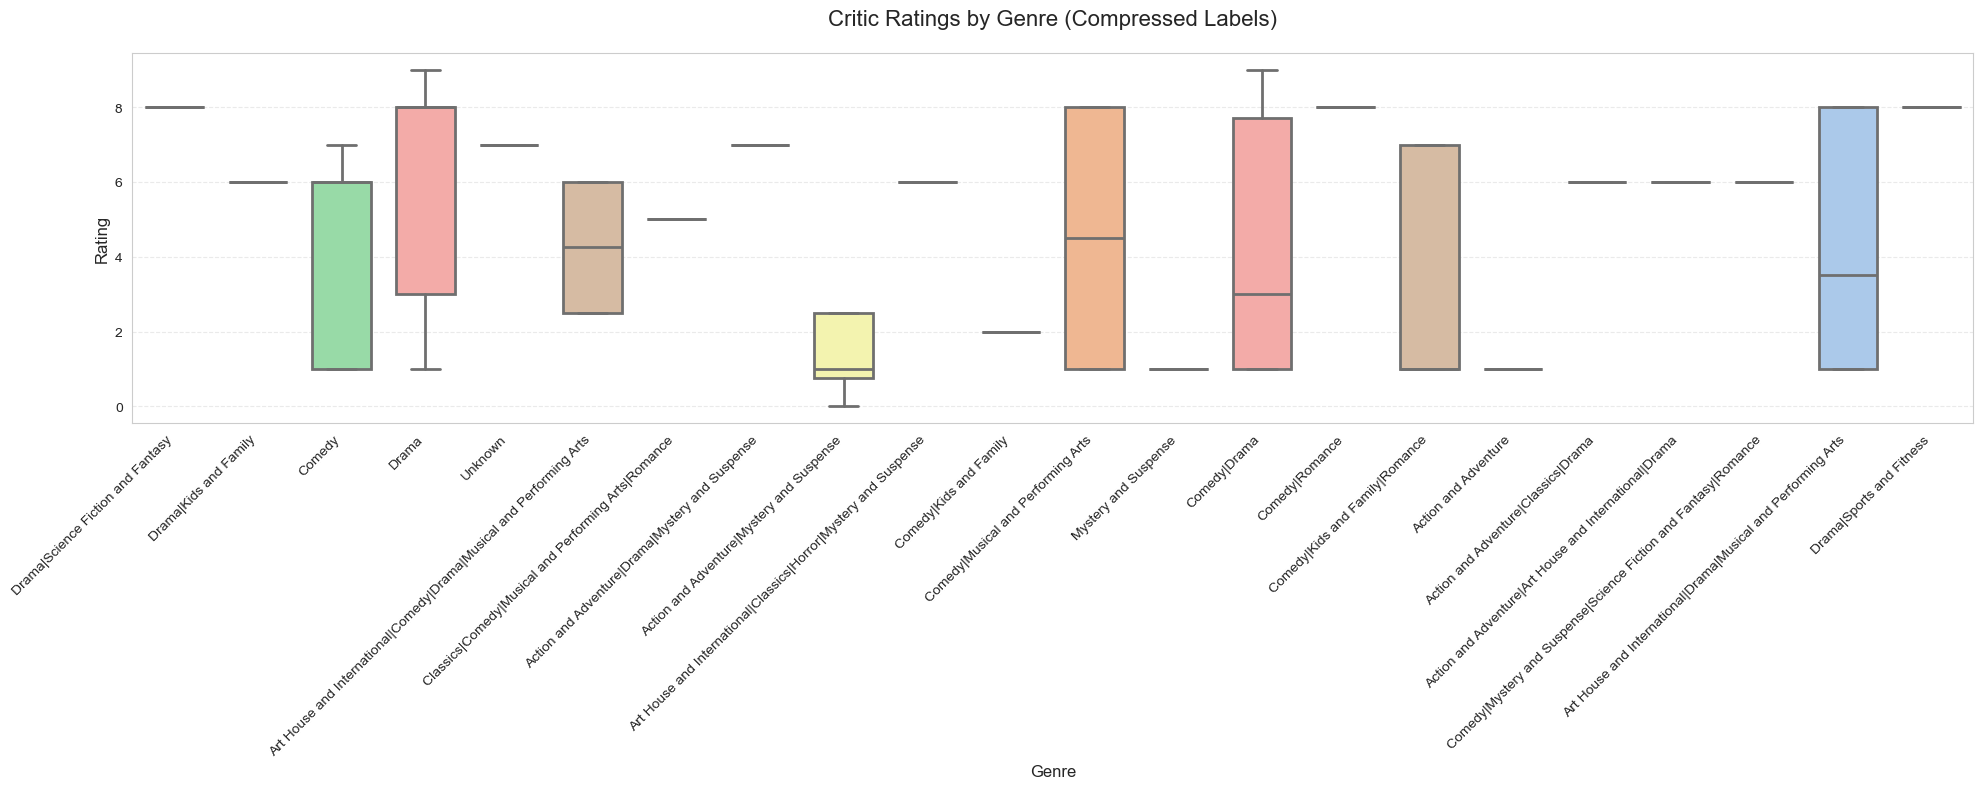

In [117]:
# 1. Convert ratings to numeric and clean data
df['rating_y'] = pd.to_numeric(df['rating_y'], errors='coerce')
plot_data = df.dropna(subset=['genre', 'rating_y'])

# 2. Set a WIDER figure size (focus on width to compress x-axis labels)
plt.figure(figsize=(20, 8))  # Wider (20") to give more space for compressed labels

# 3. Create the boxplot with tight x-axis spacing
box = sns.boxplot(
    data=plot_data,
    x='genre',
    y='rating_y',
    palette='pastel',  # Soft colors
    width=0.7,
    linewidth=2,
    showfliers=False   # Hide outliers for cleaner look
)

# 4. Compress x-axis labels by adjusting layout
plt.xticks(
    rotation=45,       # 45-degree angle
    ha='right',        # Right-aligned for better fit
    fontsize=10        # Slightly smaller font to fit more
)

# 5. Add space between x-axis labels and plot
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin to prevent label cutoff

# 6. Customize titles and grid
plt.title('Critic Ratings by Genre (Compressed Labels)', fontsize=16, pad=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)  # Horizontal grid lines

# 7. Show plot
plt.tight_layout()  # Automatically adjusts spacing
plt.show()

## 4.5 ROI vs. Critic Rating by Genre

This scatterplot explores the relationship between **critic ratings** and **Return on Investment (ROI)** across different movie genres. Each point represents a film, colored by genre, with higher ratings and ROI indicating stronger critical and commercial performance. The visualization helps identify whether critically acclaimed films also tend to be financially successful, and whether certain genres exhibit stronger patterns in this relationship.


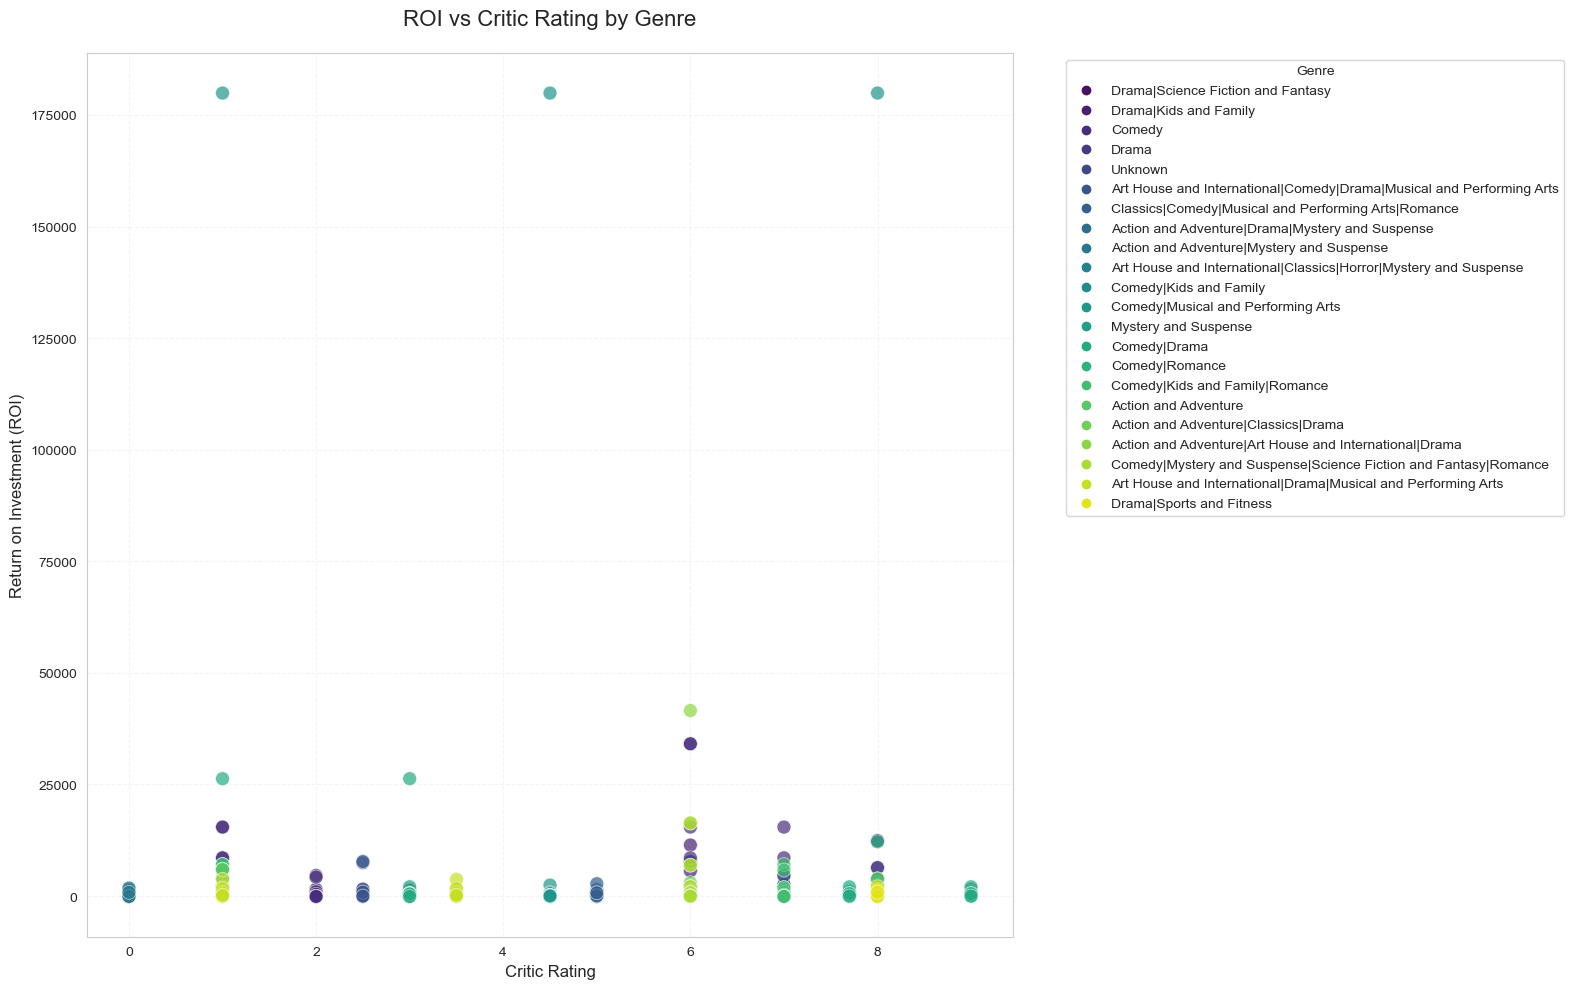

In [118]:
# 1. Clean the data (drop rows with missing values in key columns)
df_clean = df.dropna(subset=['rating_y', 'ROI', 'genre']).copy()

# 2. Convert columns to numeric (if they aren't already)
df_clean['rating_y'] = pd.to_numeric(df_clean['rating_y'], errors='coerce')
df_clean['ROI'] = pd.to_numeric(df_clean['ROI'], errors='coerce')

# 3. Create the scatterplot with error handling
plt.figure(figsize=(16, 10))  # Larger figure size

try:
    scatter = sns.scatterplot(
        data=df_clean,
        x='rating_y',
        y='ROI',
        hue='genre',
        palette='viridis',  # Colorblind-friendly palette
        alpha=0.7,
        s=100,              # Larger dots
        edgecolor='w',      # White borders
        linewidth=0.5
    )
    
    # Add titles and labels
    plt.title('ROI vs Critic Rating by Genre', fontsize=16, pad=20)
    plt.xlabel('Critic Rating', fontsize=12)
    plt.ylabel('Return on Investment (ROI)', fontsize=12)
    
    # Improve legend placement
    plt.legend(
        bbox_to_anchor=(1.05, 1),  # Outside the plot
        loc='upper left',
        title='Genre',
        frameon=True
    )
    
    # Add gridlines for readability
    plt.grid(alpha=0.2, linestyle='--')
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")
    print("Sample of problematic data:")
    print(df_clean[['rating_y', 'ROI', 'genre']].head())

## 4.6 Top 10 Studios by Average Profit (in Millions USD)

This horizontal bar chart showcases the top 10 movie studios ranked by their **average profit**. The profits have been converted into millions of USD for easier interpretation. This visualization highlights which studios consistently deliver strong financial performance, providing insights into dominant players in the film industry from a profitability perspective.


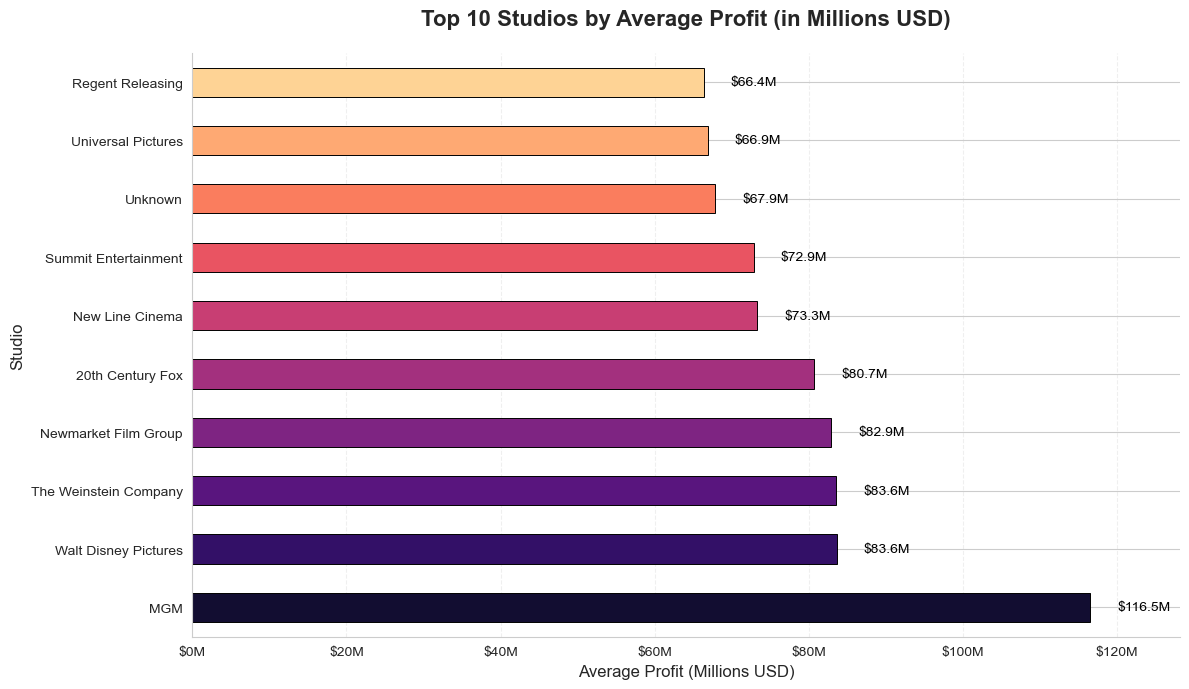

In [119]:
# Data preparation
top_studios = (df.groupby('studio_x')['profit']
               .mean()
               .sort_values(ascending=False)
               .head(10))

# Convert to millions for cleaner axis labels
top_studios_m = top_studios / 1000000

# Style setup
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
ax = top_studios_m.plot(
    kind='barh',
    color=sns.color_palette("magma", len(top_studios)),
    edgecolor='black',
    linewidth=0.7
)

# Customize plot
plt.title(
    'Top 10 Studios by Average Profit (in Millions USD)',
    fontsize=16,
    pad=20,
    fontweight='bold'
)
plt.xlabel('Average Profit (Millions USD)', fontsize=12)
plt.ylabel('Studio', fontsize=12)
plt.xlim(0, top_studios_m.max() * 1.1)  # Add 10% padding

# Add value labels on bars
for i, v in enumerate(top_studios_m):
    ax.text(
        v + (0.03 * top_studios_m.max()),  # Position text slightly right of bar
        i,
        f'${v:.1f}M',
        color='black',
        fontsize=10,
        va='center'
    )

# Improve tick labels
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_major_formatter('${x:,.0f}M')

# Add subtle grid
ax.xaxis.grid(True, linestyle='--', alpha=0.3)

# Remove spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

## 4.7 Movie Runtime Distribution by Genre

This visualization combines a **boxplot** and **stripplot** to show the distribution of movie runtimes across different genres. The boxplot highlights the median, quartiles, and overall spread of runtimes, while the overlaid stripplot adds individual data points for a more granular view. Outliers are hidden for clarity, but the stripplot helps retain insight into runtime density and variability within each genre.


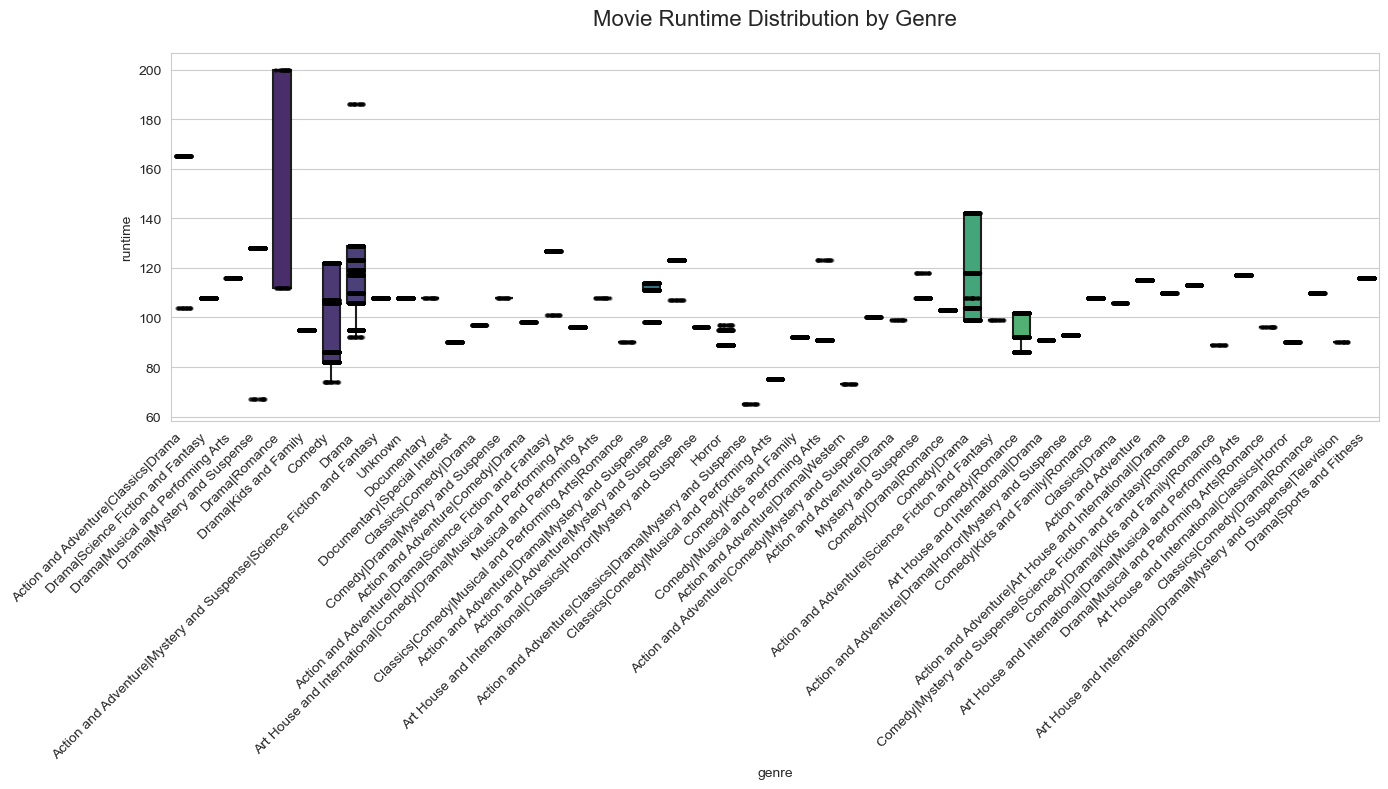

In [120]:
# Movie runtime distribution by genre
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Boxplot
sns.boxplot(
    data=df,
    x='genre',
    y='runtime',
    palette='viridis',
    width=0.7,
    linewidth=1.5,
    showfliers=False
)

# Stripplot alternative
sns.stripplot(
    data=df,
    x='genre',
    y='runtime',
    color='black',
    alpha=0.3,
    jitter=0.3,  # Adjust jitter (0.3 is good for dense data)
    size=3
)

plt.title('Movie Runtime Distribution by Genre', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4.8 Production Budget vs. Profit (in Millions USD)

This scatterplot visualizes the relationship between **production budgets** and **profits** for movies, categorized by genre. The plot highlights whether higher spending leads to higher profits and includes reference lines for the **break-even point** and **1:1 ROI**. Genres are grouped to emphasize the most common ones, while extreme outliers are annotated for context. The overall correlation between budget and profit is also displayed, helping assess the strength of this financial relationship.


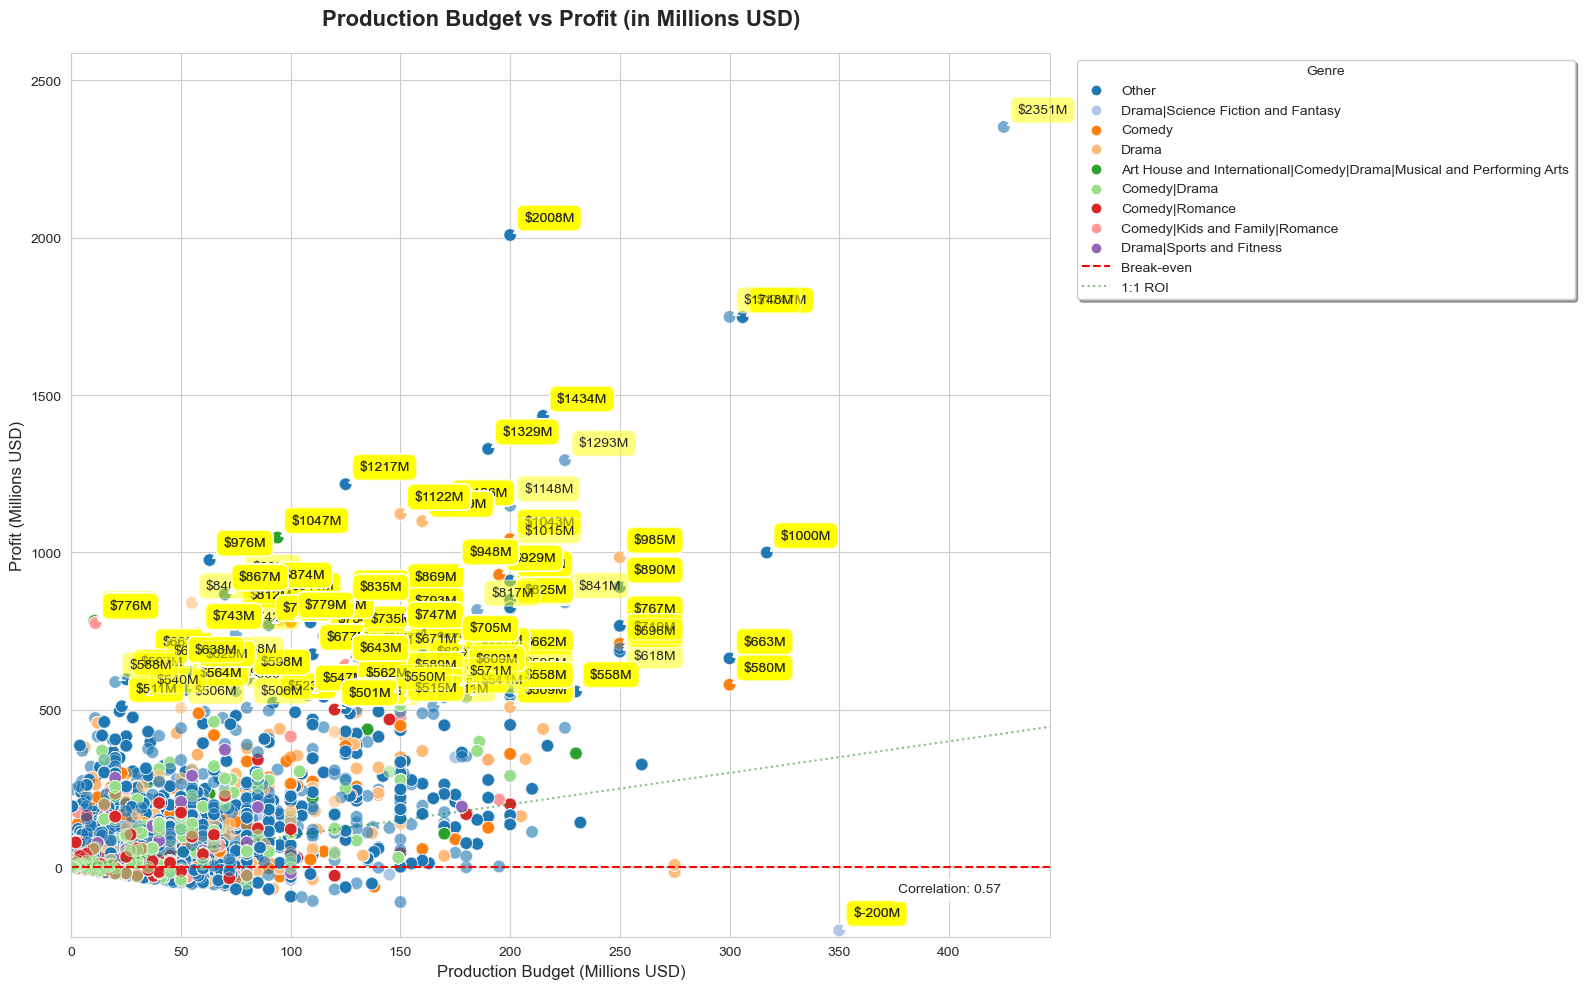

In [121]:
# Scatter plot of production budget vs profit
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

# Convert to millions
df_plot = df.copy()
df_plot['production_budget'] = df_plot['production_budget'] / 1_000_000
df_plot['profit'] = df_plot['profit'] / 1_000_000

# Group genres to reduce clustering
genre_counts = df_plot['genre'].value_counts()
top_genres = genre_counts.head(8).index.tolist()  # Keep top 8 genres
df_plot['genre_grouped'] = df_plot['genre'].apply(lambda x: x if x in top_genres else 'Other')

# Create scatterplot
scatter = sns.scatterplot(
    data=df_plot.dropna(subset=['production_budget', 'profit', 'genre_grouped']),
    x='production_budget',
    y='profit',
    hue='genre_grouped',
    palette='tab20',  # Better for many categories
    alpha=0.6,
    s=80,
    edgecolor='w',
    linewidth=0.5
)

# Reference lines
plt.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Break-even')
plt.axline((0, 0), slope=1, color='green', linestyle=':', alpha=0.5, label='1:1 ROI')

# Annotate only the most extreme outliers
outliers = df_plot[(df_plot['profit'].abs() > 500) | (df_plot['production_budget'] > 300)]
if not outliers.empty:
    for _, row in outliers.iterrows():
        plt.annotate(
            row['title'] if 'title' in df.columns else f"${row['profit']:.0f}M",
            (row['production_budget'], row['profit']),
            xytext=(10, 10),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->')
        )

# Labels and titles
plt.title('Production Budget vs Profit (in Millions USD)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Production Budget (Millions USD)', fontsize=12)
plt.ylabel('Profit (Millions USD)', fontsize=12)

# Legend outside plot
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Genre',
    frameon=True,
    shadow=True,
    fontsize=10
)

# Adjust axes limits
plt.xlim(left=0)
plt.ylim(bottom=df_plot['profit'].min() * 1.1, top=df_plot['profit'].max() * 1.1)

# Add correlation
if not df_plot.empty:
    corr = df_plot[['production_budget', 'profit']].corr().iloc[0,1]
    plt.text(0.95, 0.05, f'Correlation: {corr:.2f}',
             transform=plt.gca().transAxes,
             ha='right',
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()